In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:/Users/devli/Downloads/Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df_Final = df.copy()

In [4]:
del df['country']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [6]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
samples = df.values # get all row and columne with header
samples

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [8]:
!pip install yellowbrick

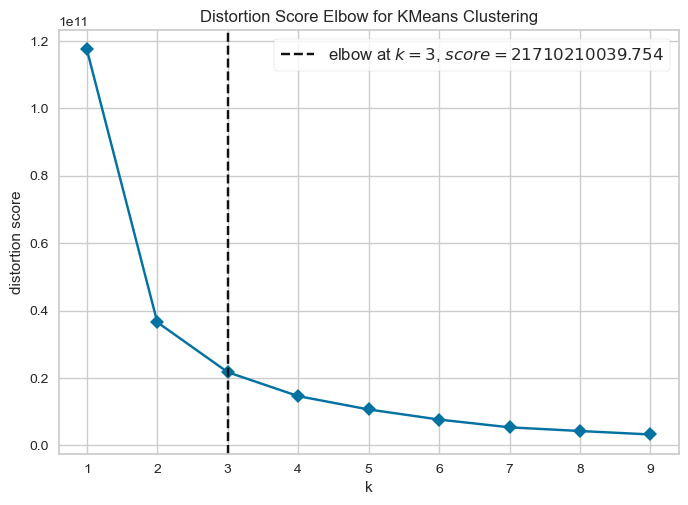

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(samples)        # Fit the data to the visualizer
visualizer.show()

In [10]:
model2 = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [11]:
df_Final['Cluster_Made'] = model2.fit_predict(samples)
df_Final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Made
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [12]:
df_Final.Cluster_Made = df_Final.Cluster_Made.replace([0,1,2],['First Group','Second Group','Third Group'])
df_Final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Made
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Second Group
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Second Group
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Second Group
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Second Group
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Second Group


In [13]:
model2.cluster_centers_

array([[6.22857143e+00, 9.64428571e+01, 5.71285714e+00, 6.85714286e+01,
        8.03428571e+04, 6.38871429e+00, 8.02857143e+01, 1.76714286e+00,
        6.54428571e+04],
       [4.73898437e+01, 3.58656172e+01, 6.33203125e+00, 4.59216086e+01,
        8.56924219e+03, 8.95764844e+00, 6.78734375e+01, 3.26335938e+00,
        4.43839063e+03],
       [8.80000000e+00, 4.99781250e+01, 8.99156250e+00, 4.60218750e+01,
        3.76218750e+04, 3.38331250e+00, 7.91562500e+01, 1.94468750e+00,
        3.55875000e+04]])

In [14]:
df_Final.Cluster_Made.value_counts(ascending=False)

Cluster_Made
Second Group    128
Third Group      32
First Group       7
Name: count, dtype: int64

In [15]:
Submission = df_Final.loc[:,['country','Cluster_Made']]
Submission

,country,Cluster_Made
0,Afghanistan,Second Group
1,Albania,Second Group
2,Algeria,Second Group
3,Angola,Second Group
4,Antigua and Barbuda,Second Group
...,...,...
162,Vanuatu,Second Group
163,Venezuela,Second Group
164,Vietnam,Second Group
165,Yemen,Second Group


# Finished